1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
#max_speeds
cumulProb = (np.arange(years_nb, dtype=np.float32) + 1)
cumulProb=cumulProb/(years_nb + 1)
Orderedspeeds = np.sort(max_speeds)
#create quantile function
quantile_func = UnivariateSpline(cumulProb, Orderedspeeds)
#interpolate it with data
x=np.array([i/100 for i in range(0,100)])
Interpolated= quantile_func(x)
#compute max wind speed in fifty years
fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
print("The predicted max wind speed in 50 years is",fifty_wind)

The predicted max wind speed in 50 years is 32.97989825386221


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Phase of Maximum Temperatures -0.24785940917426333 +- 0.12602230309171317
Phase of Minimum Temperatures -0.5463063679662279 +- 0.14304938129506425
The phase compatibility is 1.5654757209836738


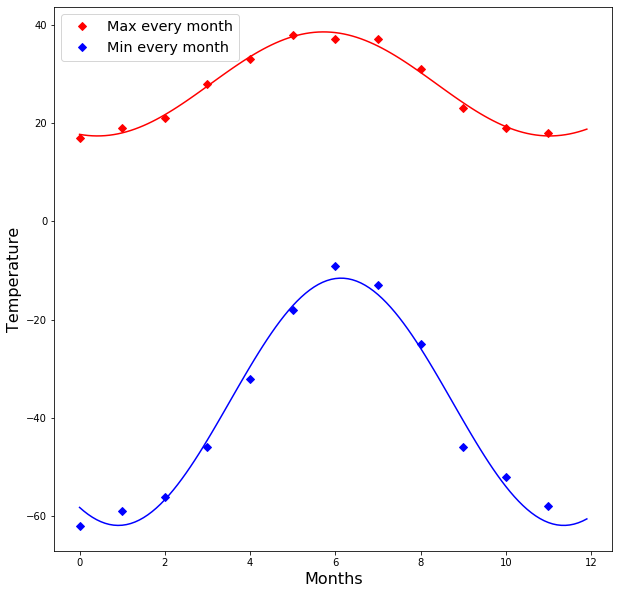

In [4]:
from scipy import optimize
import math

def funz(x,A,w,phase,offs):
    return offs+A*np.cos(w*x+phase)

months = np.arange(12)
max=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
paramsMin, params_covarianceMin = optimize.curve_fit(funz, months, min, p0=[-20,2*math.pi/12,0,-35])
paramsMax, params_covarianceMax = optimize.curve_fit(funz, months, max, p0=[-10,2*math.pi/12,0,30])
plt.figure(figsize=(10,10))
#since using months as x of func makes the plot a little too "segmented", I'll define a more dense x array
x=np.array([i/10 for i in range(0,120)])
plt.plot(months, max, 'rD',label="Max every month")
plt.plot(x, funz(x, *paramsMax), 'r-')
plt.plot(months, min, 'bD',label="Min every month")
plt.plot(x, funz(x, *paramsMin), 'b-')
plt.xlabel('Months', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.legend(loc="upper left")
plt.rc('axes', labelsize="xx-large")    # fontsize of the x and y labels
plt.rc('legend', fontsize="x-large")    # legend fontsize
#the values on the diagonal of the covariance matrix are the square of the errors of the parameters
#phase is the third parameter, corresponding to i=2
i=2
print("Phase of Maximum Temperatures", paramsMax[i],"+-", math.sqrt(params_covarianceMax[i][i]))
print("Phase of Minimum Temperatures", paramsMin[i],"+-", math.sqrt(params_covarianceMin[i][i]))
#the fit appear to be reasonable, but the two phases have goodish compatible with eachother (but their w match really well)
print("The phase compatibility is", (paramsMax[i]-paramsMin[i])/math.sqrt(params_covarianceMax[i][i]+params_covarianceMin[i][i]))

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


Coordinates of minima and respective function value
[-0.0898939   0.71266512] f= -1.0316284428220837
[ 0.08984186 -0.71265699] f= -1.0316284534868452
[ 1.70360669 -0.79608355] f= -0.21546382438371225
[-1.70360638  0.79608335] f= -0.21546382438215894
Indeed we see the first two are the global minima, where f(x,y)= -1.0316284428220837


                        fun: -1.0316284534898772
 lowest_optimization_result:       fun: -1.0316284534898772
 hess_inv: array([[ 0.12932521, -0.00770458],
       [-0.00770458,  0.05995863]])
      jac: array([2.98023224e-08, 7.45058060e-08])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([-0.08984202,  0.7126564 ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4760
                        nit: 100
                       njev: 1190
                          x: array([-0.08984202,  0.7126564 ])

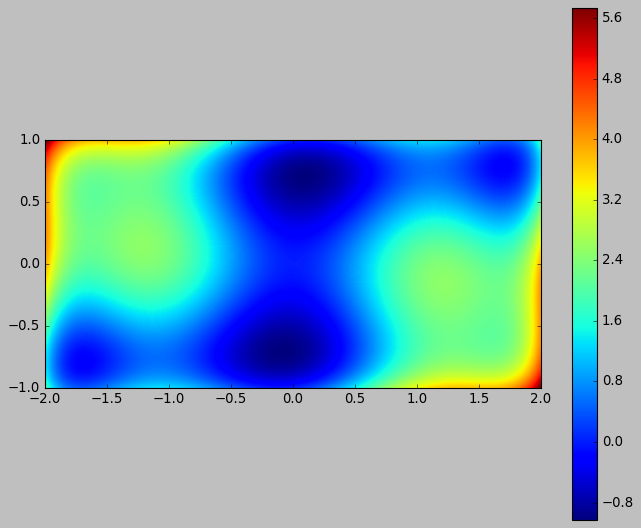

In [17]:
def shcfunz(x):
    return(4-2.1*x[0]**2+(x[0]**4)/3)*x[0]*x[0]+x[0]*x[1]+4*(x[1]**2-1)*x[1]**2
plt.figure(figsize=(10,8))
x = np.linspace(-2, 2,100)
y = np.linspace(-1, 1,100)
xg, yg = np.meshgrid(x, y)
#plot
plt.style.use('classic')
plt.imshow(shcfunz([xg, yg]), extent=[-2, 2, -1, 1])
#legend
plt.colorbar()
#we can identify 4 minima and 4 maxima
#we are only intersted at the minima. From the figure we suspect the global ones are the one with x close to 0
#ofc since f is simmetric under x->-x and y->-y, we espect the two minima to be simmetric

#1)methods in optimize.minimize
#global
NM=optimize.minimize(shcfunz,(0,0.7),method='Nelder-Mead')
POW=optimize.minimize(shcfunz,(0,-0.7),method='Powell')
#locals
CG=optimize.minimize(shcfunz,(1.5,0.7),method='CG')
BFGS=optimize.minimize(shcfunz,(-1.5,-0.7),method='BFGS')
#print(NM.x,POW.x,CG.x,BFGS.x) #checking the differented method tried give same result if starting from same point (True)
#giving the same start to every method, they bring the same result
#to prove which minimums are global and which local we will compute f(x,y) in such points
print("Coordinates of minima and respective function value")
print(NM.x,"f=",shcfunz(NM.x))
print(POW.x,"f=",shcfunz(POW.x))
print(CG.x,"f=",shcfunz(CG.x))
print(BFGS.x,"f=",shcfunz(BFGS.x))
print("Indeed we see the first two are the global minima, where f(x,y)=",shcfunz(NM.x))
#2)basinhoppin
from scipy.optimize import basinhopping
solution1= basinhopping(shcfunz,(0,0.7), stepsize=1,)
solution2= basinhopping(shcfunz,(0,-0.7), stepsize=1,)

#print("##### SOLUTION 1 is",solution1,"\n##### SOLUTION 2 is",solution2)

#for (x,y)=(0,0), we would have f=0. we can notice by the plot this is a "Sella" point
sella=basinhopping(shcfunz,(0,0), stepsize=1,)
#sella=optimize.minimize(shcfunz,(0,0),method='Nelder-Mead')
sella
#in this way, when he moves randomly to look for the minimum the first time, if it moves towards positive y, it will
#follow the "valley" and find solution1, while if the opposite happens, it will be lead to solution2
#which one of the two it will provide is random

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

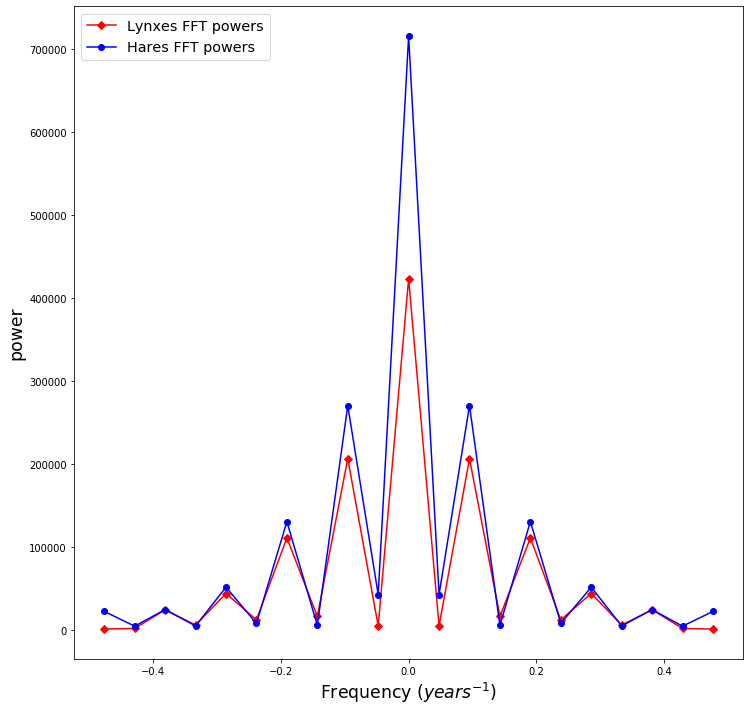

In [14]:
from scipy import fftpack

Data=np.loadtxt("populations.txt",comments="#")#or skiprows=1
Years=Data[:,0]
Hares=Data[:,1]
Lynxes=Data[:,2]

Lyn_fft = fftpack.fft(Lynxes)
Har_fft = fftpack.fft(Hares)
Diff_fft = fftpack.fft(Lynxes-Hares)

Lyn_power = np.abs(Lyn_fft)
Har_power = np.abs(Har_fft)
Diff_power = np.abs(Diff_fft)

sample_freq = fftpack.fftfreq(Years.size,1)

x,y_har,y_lyn,y_diff=zip(*sorted(zip(sample_freq, Har_power, Lyn_power, Diff_power)))
plt.figure(figsize=(12, 12))
plt.plot(x, y_lyn,"r-D",label="Lynxes FFT powers")
plt.plot(x, y_har,"b-o",label="Hares FFT powers")
#plt.plot(x, y_diff,"k-x",label="Difference FFT powers")
#the difference follows the same pattern, so I commented it to make image more readable
plt.xlabel('Frequency ($years^{-1}$)')
plt.ylabel('power')
plt.legend(loc="upper left")

#they all follow the same power spectrum shape, as a confirmation of the fact that they are correlated

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

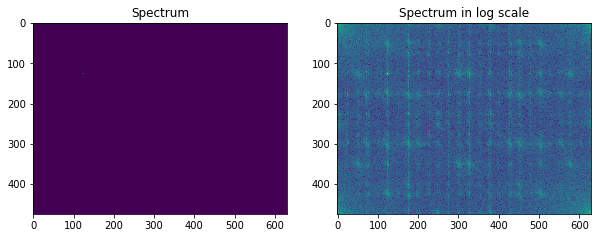

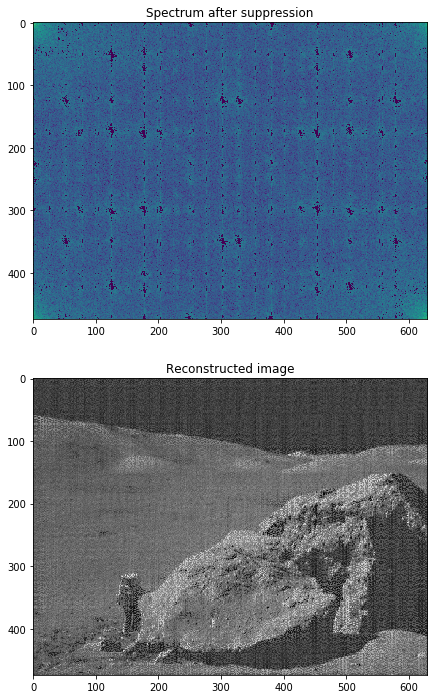

In [38]:
image=plt.imread("moonlanding.png")
M, N = image.shape
#FFT
F = fftpack.fft2(image)
F_magnitude = np.abs(F)
#plots of originals and FFT
f, (ax, bx) = plt.subplots(1,2,figsize=(10, 6))
ax.imshow(F_magnitude)
ax.set_title('Spectrum')

bx.imshow(np.log10(1 + np.abs(F_magnitude)))
bx.set_title('Spectrum in log scale')

#without setting using a log, it is impossible to distinguish anything in the spectra, since there are
#huge order of magnitude differences between its bigger peak (the blue dot on the upper left, circa at (100,100))
#and the rest of the spectra, all depicted as violet

#shift 0 frequency spectra to middle
F_magnitude = fftpack.fftshift(F_magnitude)
# Set block around center of spectrum to zero
K = 40
F_magnitude[M//2-K: M//2+K, N//2-K: N//2+K] = 0

# Find all peaks higher than the 98th percentile. Choosing a bigger value means kepping more noise,
#choosing a smaller one means losing lots of details in the photo
peaks = F_magnitude < np.percentile(F_magnitude, 98)
# Shift the peaks back to align with the original spectrum
peaks = fftpack.ifftshift(peaks)

# Make a copy of the original (complex) spectrum, and set peak coeffs to 0
F_dim = F.copy()
F_dim = F_dim * peaks.astype(int)

# Let's finally plot the filtered image
image_filtered = np.abs(fftpack.ifft2(F_dim))

f, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 12))
ax0.imshow(np.log10(1 + np.abs(F_dim)))
ax0.set_title('Spectrum after suppression')

ax1.imshow(image_filtered, plt.cm.gray) #gray is cooler
ax1.set_title('Reconstructed image');